### Source:
|Study ID	|Mean IPP 	|SD	|Sample size|
|-----------|-----------|---|-----------|
|Giuliani2020	|14.9	|2.9	|77
Castellanos2017	|18	|4.4	|49
Ventura2000	|19.6	|12.8	|81
Lauro1999	|14.5	|0.54	|30
Fishbach2003	|9.6	|2.7	|17
Scanziani2003	|14.3	|2.5	|34
Dejardin2007	|13.5	|3.3	|61
Outerelo2014	|18.8	|5.2	5|4
Sigogne2020	|14.6	|3.5	|60
Rusthoven2005	|12	|6.5	|30
Betancourt2023	|16.6	|4.5	|124
Aranda2000	|11.29	|4.61	|24

### Egger's test in Python:

### Prerequisites
- Install necessary Python packages: `numpy`, `scipy`, `matplotlib`

### Steps to Perform Egger's Test
1. **Collect Data**: Obtain the effect size for each study included in the meta-analysis.
2. **Standardize Effect Sizes**: Calculate the standardized effect size by dividing the effect size by its standard error: 
   $$
   \text{Standardized Effect Size} = \frac{\text{Effect Size}}{\text{Standard Error}}
   $$

3. **Precision**: Calculate the precision of each study as the inverse of the standard error: 
   $$
   \text{Precision} = \frac{1}{\text{Standard Error}}
   $$

4. **Linear Regression**: Perform a weighted least squares regression of the standardized effect sizes on precision. 

5. **Test Intercept**: Check whether the intercept from the regression significantly differs from zero.


In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Provided data
study_data = {
    'study_id': [
        'Giuliani2020', 'Castellanos2017', 'Ventura2000 1', 'Lauro1999 2',
        'Fishbach2003', 'Scanziani2003', 'Dejardin2007', 'Outerelo2014',
        'Sigogne2020', 'Rusthoven2005', 'Betancourt2023', 'Aranda2000 1'
    ],
    'mean_ipp': [14.9, 18, 19.6, 14.5, 9.6, 14.3, 13.5, 18.8, 14.6, 12, 16.6, 11.29],
    'sd': [2.9, 4.4, 12.8, 0.54, 2.7, 2.5, 3.3, 5.2, 3.5, 6.5, 4.5, 4.61],
    'n': [77, 49, 81, 30, 17, 34, 61, 54, 60, 30, 124, 24]
}

# Calculating the Standard Error (SE)
study_data['se'] = np.divide(study_data['sd'], np.sqrt(study_data['n']))

# Standardized effect sizes
study_data['standardized_effect'] = np.divide(study_data['mean_ipp'], study_data['se'])

# Precision
study_data['precision'] = np.divide(1, study_data['se'])

# Egger's Test (Linear regression of standardized effect sizes on precision)
slope, intercept, r_value, p_value, std_err = stats.linregress(
    study_data['precision'], study_data['standardized_effect']
)

# Egger's Test Results
display((slope, intercept, r_value, p_value, std_err), p_value < 0.05)


(14.479259073281442,
 0.553428535495641,
 0.9937679615766164,
 7.326303605468578e-11,
 0.5135866369070794)

True

### Begg’s Test in python
1. **Rank Correlation**: Calculate the rank correlation (Kendall's tau) between the effect sizes and their variances.
2. **Significance Test**: Determine whether the calculated correlation is statistically significant. If it is, this is considered as evidence of publication bias.

In [6]:

# Calculating Begg's rank correlation test
tau, p_value = stats.kendalltau(study_data['mean_ipp'], study_data['se'])

# Results
display((tau, p_value), p_value < 0.05)


(0.0606060606060606, 0.8405883696421891)

False

### Visualisation

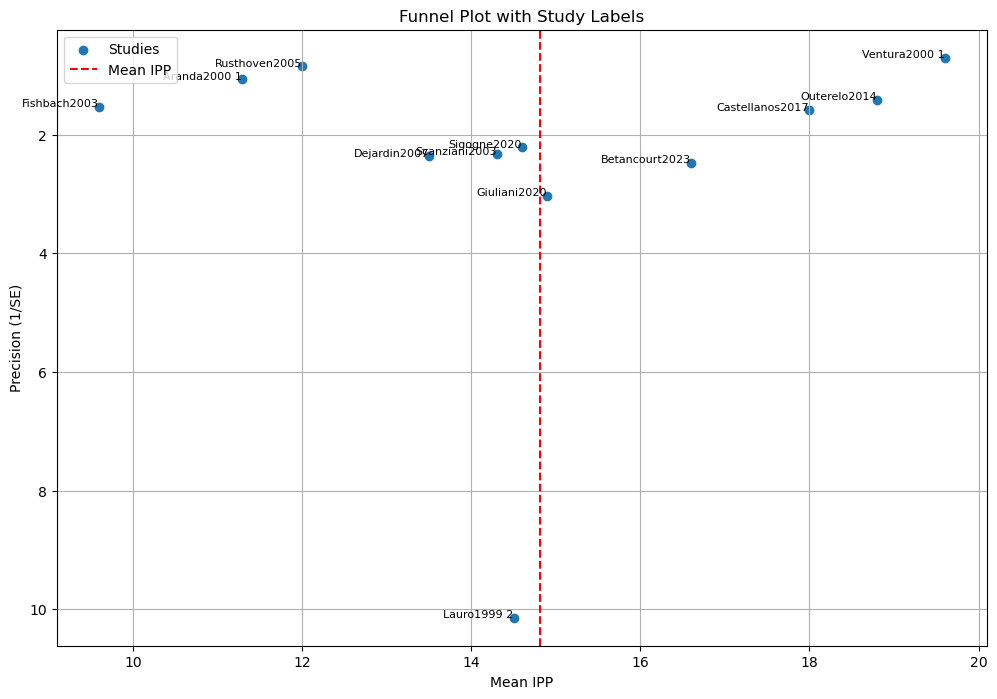

In [4]:
# Creating a funnel plot with study labels
plt.figure(figsize=(12, 8))
plt.scatter(study_data['mean_ipp'], study_data['precision'], label='Studies')

# Adding labels
for i, txt in enumerate(study_data['study_id']):
    plt.annotate(txt, (study_data['mean_ipp'][i], study_data['precision'][i]), fontsize=8, ha='right')

# Adding labels, title, and legend
plt.xlabel('Mean IPP')
plt.ylabel('Precision (1/SE)')
plt.title('Funnel Plot with Study Labels')
plt.axvline(x=np.mean(study_data['mean_ipp']), color='red', linestyle='--', label='Mean IPP')
plt.legend()
plt.gca().invert_yaxis()
plt.grid(True)

# Displaying the plot
plt.show()
